## Business Description :: Hoax and Truth Detector

Many a times we have seen the **misuse of the information** and in the world of digital era, it has become more sensitive due to wider reach and fast delivery. There are many antisocial elements like hackers, hired in society who try to misuse the means of information like social media and other informative platorms to spread misleading information or political propaganda or money swindling announcements. To curb all this, we can take a step to find the difference between the fake and the true news. **This is what this project does, predicts whether a piece of information posted online is a hoax or a truth.** 

Suggestions in 1:1 meeting:
    
    1. State Testing approach whether it is Generic or not, what is the user perspective. 
        Action: It is generic as of now, since the project is yet to be deployed online. User will be able to use it once it                   get deployed.
    
    2. Use NLP
        Action: NLP added in the projects using stopwords technique.

### Data loading and reading
- We have 2 datasets here one have all the entries with fake news and other have the details about True news.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sn.set(color_codes=True)
from sklearn.utils import shuffle

fake = pd.read_csv("D:/Downloads/Assignments/Algorithms/project/Fake.csv")
true = pd.read_csv("D:/Downloads/Assignments/Algorithms/project/True.csv")


In [2]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [5]:

fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
print("fake dataset specs")
print(fake.isnull().sum())
print("")
print("true dataset specs")
print(true.isnull().sum())

fake dataset specs
title      0
text       0
subject    0
date       0
dtype: int64

true dataset specs
title      0
text       0
subject    0
date       0
dtype: int64


#### Adding the labels to the respective datasets for further steps

In [7]:
fake['target'] = 'fake'
true['target'] = 'true'
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [8]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


#### Concatenating the data into one dataset for processing

In [9]:
df = pd.concat([fake, true]).reset_index(drop = True)

In [10]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#### Shuffling the data to avoid the machine bias

In [11]:
df = shuffle(df)
df = df.reset_index(drop=True)

### Data Cleaning and Feature Engineering

#### Dropping the data and title columns from dataframe since we wont be using it

In [12]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)


#### Converting the present text in dataframe to lower case alphabets. 

In [13]:
df['text'] = df['text'].apply(lambda x: x.lower())


In [14]:
df.head()

,text,subject,target
0,fantastic testimony on the disastrous results...,Government News,fake
1,elizabeth warren is one of the most popular li...,News,fake
2,"pope francis, while appearing at the united na...",News,fake
3,"krynica-zdroj, poland (reuters) - the european...",worldnews,true
4,(reuters) - u.s. president donald trump said o...,politicsNews,true


#### Using NLP technique

In [15]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df['text'] = df['text'].apply(punctuation_removal)

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yugbh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.shape

(44898, 3)

## EDA 

In [18]:
print(df.groupby(['subject'])['text'].count())


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


#### Finding out the count of articles as per subject

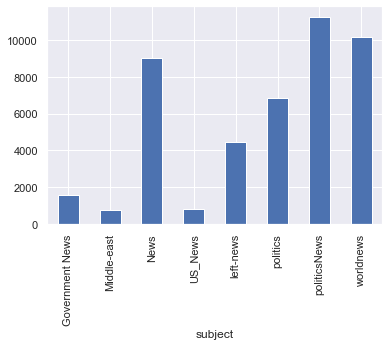

In [19]:
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [20]:
df.groupby(['target'])['text'].count()


target
fake    23481
true    21417
Name: text, dtype: int64

#### Finding out the count of fake and real news. we can see we have more fake news than true or real ones.

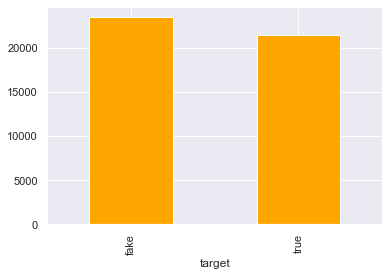

In [21]:
df.groupby(['target'])['text'].count().plot(kind='bar',color='orange')
plt.show()


#### Checking out with worcloud the intensity of maximum used words in Fake and real news respectively.

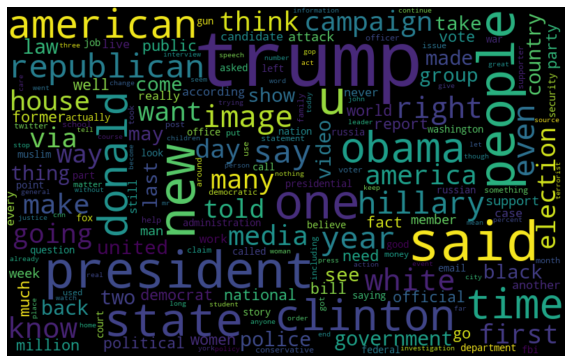

In [22]:
from wordcloud import WordCloud

fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

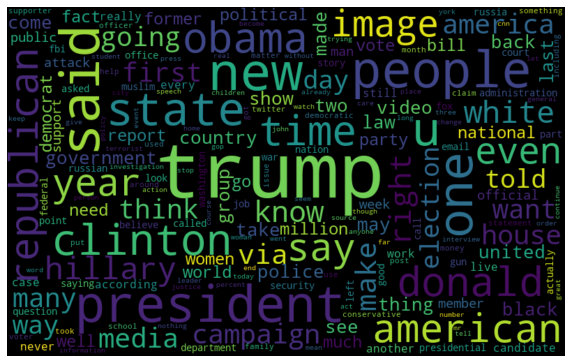

In [23]:
real_data = df[df["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Model Training

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.3, random_state=101)

### Algorithm Selection: 

training data is not so high  in number it is in 5000s so picking high bias/low variance like Linear regression algorithm makes sense.
However, we will try other suitable algorithms also like Decision tree and Random Forest as well to check and compare the relevant accuracy.

#### Linear Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [26]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])


In [27]:
# Fitting the model
model = pipe.fit(X_train, y_train)


In [28]:
predictions= model.predict(X_test)

In [29]:
print("Confusion matrix result for Linear Regression is")
print(confusion_matrix(y_test,predictions))

Confusion matrix result for Linear Regression is
[[7009   94]
 [  63 6304]]


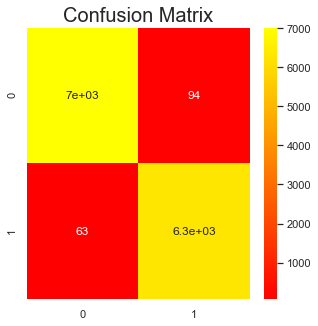

In [30]:
cm = confusion_matrix(y_test, predictions)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'autumn')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [31]:
# Accuracy
prediction = model.predict(X_test)
print("accuracy for Linear Regression: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy for Linear Regression: 98.83%


##### So, we are hitting the accuracy of **98%** with Linear regression woth the testing data which is quite high, but still in the confusion matrix we can see there is noticable number of False negatives as well. So we will look for other algorithms to tune Precision and Recall

#### Decision tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy for Decision Tree classifier: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy for Decision Tree classifier: 99.65%


Confusion matrix result for Decision Tree Classifier is
[[7009   94]
 [  63 6304]]


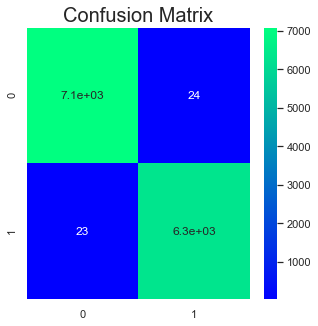

In [33]:
cm = confusion_matrix(y_test, prediction)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
print("Confusion matrix result for Decision Tree Classifier is")
print(confusion_matrix(y_test,predictions))
plt.show()


#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy for Random Forest Classifier: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy for Random Forest Classifier: 98.95%


Confusion matrix result for Random Forest is
[[7009   94]
 [  63 6304]]


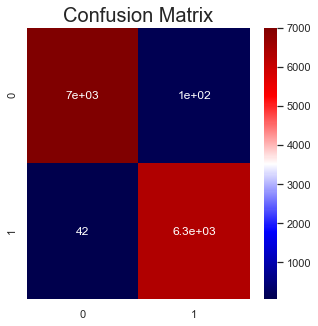

In [35]:
cm = confusion_matrix(y_test, prediction)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'seismic')
plt.title('Confusion Matrix', fontsize = 20)
print("Confusion matrix result for Random Forest is")
print(confusion_matrix(y_test,predictions))
plt.show()

### Analysis breakdown

As we can see in the above code we have used **Linear Regression, Decision Tree and Random Forest as algorithms and received notably 98.83%, 99.65% and 98.95% respectively.**
These accuracy are legitimate and very high higlighting the fidelity of the test output giving us very close value of whether a news is **Truth or Hoax**. We can choose the top 2 algorithms for the final implementation.

Final implementaion for this project is not yet deployed, since it has to be cloud based with a user interface and at this pont. That will be done as an extension for this project in coming part of the course.